In [1]:
from tock import *

# Regular expressions

Regular expressions were invented by Stephen Kleene (pronounced clay-knee) in the 1950s. They came into practical use in the early days of Unix (`ed`, `grep`, and friends) and really took off through the programming language Perl.

Modern regular expression libraries have a lot of extensions. The only operations allowed in real regular expressions are union, concatenation, and Kleene star. (On the other hand, for some reason, basic regular expressions in Unix don't have the union (`|`) operator. The so-called extended regular expressions have it.)

To create a regular expression in Tock (this one is from Example 1.56):

In [2]:
m = convert_regexp('(ab|a)*')

As the function name suggests, the regular expression is converted into a finite automaton, which you can view, as usual, as either a graph or a table.

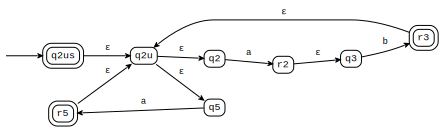

In [3]:
m.display_graph()

In [4]:
m.display_table()

,ε,a,b
q2,,r2,
q2u,"{q2,q5}",,
@>q2us,q2u,,
q3,,,r3
q5,,r5,
r2,q3,,
@r3,q2u,,
@r5,q2u,,


Example 1.58

In [5]:
m = convert_regexp('(a|b)*aba')

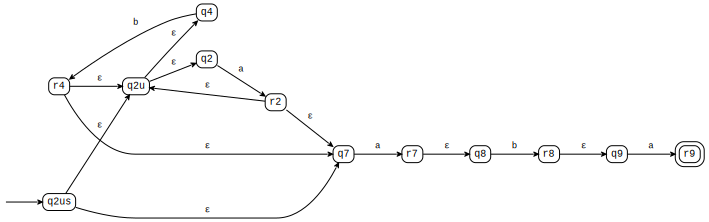

In [6]:
m.display_graph()